In [9]:
import pandas as pd

df = pd.read_csv("updated_university_salaries.csv")

$ Increase per SAT point: $90.01
Estimated salary increase for a 150-point SAT improvement: $13501.18


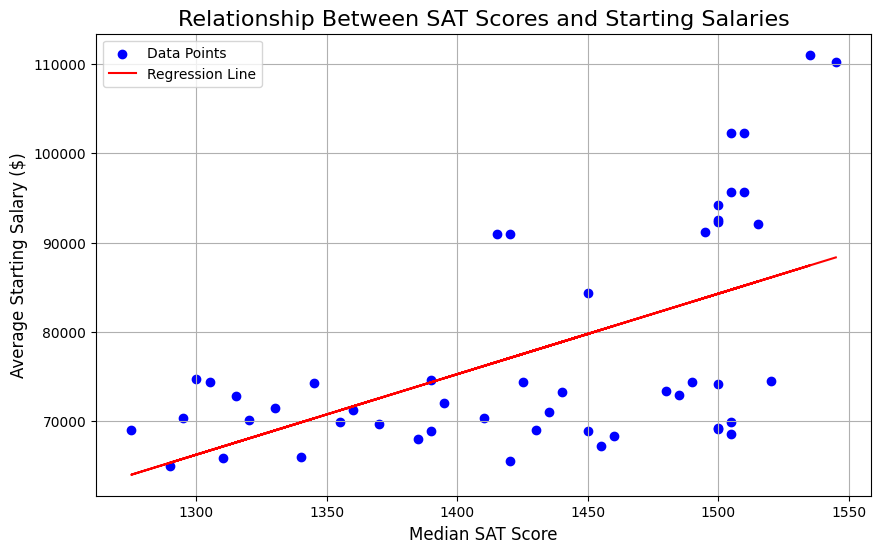

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = df["Median SAT Score"].values.reshape(-1, 1)
y = df["Average Starting Salary"].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"$ Increase per SAT point: ${slope:.2f}")

increase_150_points = slope * 150
print(f"Estimated salary increase for a 150-point SAT improvement: ${increase_150_points:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(df["Median SAT Score"], df["Average Starting Salary"], color='blue', label='Data Points')
plt.plot(df["Median SAT Score"], model.predict(X), color='red', label='Regression Line')
plt.title('Relationship Between SAT Scores and Starting Salaries', fontsize=16)
plt.xlabel('Median SAT Score', fontsize=12)
plt.ylabel('Average Starting Salary ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Extract SAT scores and salaries
X = df["Median SAT Score"].values.reshape(-1, 1)
y = df["Average Starting Salary"].values

# Fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X, y)

# Predict salary values for given SAT scores
def predict_salary_gb(sat_score):
    return gb_model.predict(np.array(sat_score).reshape(-1, 1))

# New method to calculate the average salary increase for a given SAT range
def calculate_average_increase(model, start_score, end_score):
    # Generate a range of SAT scores
    sat_scores = np.arange(start_score, end_score + 1).reshape(-1, 1)
    # Predict salaries for the range
    salary_predictions = model.predict(sat_scores)
    # Calculate the total salary increase over the range
    total_increase = salary_predictions[-1] - salary_predictions[0]
    # Calculate the average dollar value per SAT point
    average_per_point = total_increase / (end_score - start_score)
    return salary_predictions[0], salary_predictions[-1], total_increase, average_per_point

# Example: Calculate salary for a 150-point improvement (e.g., from 1400 to 1550)
start_score = 1200
end_score = 1350
start_salary, end_salary, total_increase, average_per_point = calculate_average_increase(gb_model, start_score, end_score)

# Print results
print(f"Estimated salary for SAT score {start_score}: ${start_salary:,.2f}")
print(f"Estimated salary for SAT score {end_score}: ${end_salary:,.2f}")
print(f"Estimated salary increase for a {end_score - start_score}-point SAT improvement: ${total_increase:,.2f}")
print(f"Estimated dollar value per SAT point: ${average_per_point:.2f}")


Estimated salary for SAT score 1200: $68,780.78
Estimated salary for SAT score 1350: $73,589.92
Estimated salary increase for a 150-point SAT improvement: $4,809.14
Estimated dollar value per SAT point: $32.06


In [28]:
start_score = 1300
end_score = 1450
start_salary, end_salary, total_increase, average_per_point = calculate_average_increase(gb_model, start_score, end_score)

# Print results
print(f"Estimated salary for SAT score {start_score}: ${start_salary:,.2f}")
print(f"Estimated salary for SAT score {end_score}: ${end_salary:,.2f}")
print(f"Estimated salary increase for a {end_score - start_score}-point SAT improvement: ${total_increase:,.2f}")
print(f"Estimated dollar value per SAT point: ${average_per_point:.2f}")


Estimated salary for SAT score 1300: $74,260.65
Estimated salary for SAT score 1450: $76,072.99
Estimated salary increase for a 150-point SAT improvement: $1,812.35
Estimated dollar value per SAT point: $12.08


In [29]:
start_score = 1400
end_score = 1550
start_salary, end_salary, total_increase, average_per_point = calculate_average_increase(gb_model, start_score, end_score)

# Print results
print(f"Estimated salary for SAT score {start_score}: ${start_salary:,.2f}")
print(f"Estimated salary for SAT score {end_score}: ${end_salary:,.2f}")
print(f"Estimated salary increase for a {end_score - start_score}-point SAT improvement: ${total_increase:,.2f}")
print(f"Estimated dollar value per SAT point: ${average_per_point:.2f}")


Estimated salary for SAT score 1400: $71,529.29
Estimated salary for SAT score 1550: $110,054.49
Estimated salary increase for a 150-point SAT improvement: $38,525.19
Estimated dollar value per SAT point: $256.83
